<a href="https://colab.research.google.com/github/Lima-Ricardo/Macine_Learning_Pycaret/blob/main/Agrupamento_populacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install pycaret

In [60]:
import numpy as np
import pandas as pd
from pycaret.datasets import get_data

dataset = get_data('population')

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,2.741996,2.769515,2.792110,2.811906,2.828133,2.850383,2.867694,2.861356,2.826982,...,2.385159,2.449255,2.469810,2.424469,2.335303,2.242795,2.152384,2.088283,2.050000,2.029991
1,Caribbean small states,1.911755,1.931196,1.893275,1.771980,1.605163,1.448561,1.298573,1.196177,1.164617,...,0.607070,0.633955,0.649817,0.649227,0.636539,0.614597,0.585947,0.557091,0.531885,0.514897
2,Central Europe and the Baltics,0.914136,0.843231,0.893254,0.934352,0.764829,0.735036,0.930801,0.864361,0.735317,...,-0.240341,-0.466785,-0.358132,-0.192448,-0.362710,-0.353692,-0.229155,-0.213202,-0.209757,-0.171544
3,Early-demographic dividend,2.378681,2.399318,2.411945,2.425629,2.435707,2.442855,2.455314,2.457393,2.465558,...,1.596281,1.576339,1.557348,1.538742,1.528734,1.507963,1.476112,1.457399,1.438927,1.419336
4,East Asia & Pacific,0.317912,1.356230,2.403411,2.313426,2.356414,2.604640,2.458242,2.434869,2.665623,...,0.726182,0.687229,0.689983,0.667171,0.658738,0.657531,0.668169,0.670721,0.673393,0.667919


In [61]:
type(dataset)

pandas.core.frame.DataFrame

In [62]:
dataset.shape

(255, 56)

In [63]:
base1 = dataset.sample(frac=0.9, random_state=1) # Corrected the typo in keyword argument: radom_state to random_state
base1.shape

(230, 56)

In [64]:
base1.index

Index([182,  34, 110, 112, 226, 107, 159,  27, 245, 186,
       ...
         7, 250, 141,  86,  96, 222, 227, 215,  68,  50],
      dtype='int64', length=230)

In [65]:
base2 = dataset.drop(base1.index)
base2.shape

(25, 56)

In [66]:
base2.index

Index([ 20,  25,  37,  71,  72,  79, 101, 129, 133, 134, 137, 139, 140, 142,
       144, 146, 156, 157, 178, 192, 203, 204, 212, 235, 237],
      dtype='int64')

**Configuração do ambiente Pycaret**

In [67]:
from pycaret.clustering import setup
experimento = setup(data = base1, normalize = True, ignore_features=['Country Name'],  session_id=1)

,Description,Value
0,Session id,1
1,Original data shape,"(230, 56)"
2,Transformed data shape,"(230, 285)"
3,Numeric features,55
4,Categorical features,1
5,Rows with missing values,2.2%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


**Visualizando modelos existentes**

In [68]:
from pycaret.clustering import models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


**Criação de um modelo**

In [69]:
from pycaret.clustering import create_model
kmeans =  create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0144,7.8282,5.4371,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [70]:
kmeans

KMeans(n_clusters=4, random_state=1)

In [71]:
from pycaret.clustering import assign_model
resultados_kmeans = assign_model(kmeans)
resultados_kmeans

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cluster
182,New Zealand,1.999441,2.542112,1.986583,2.094972,1.649506,1.791048,1.785233,0.877167,0.894788,...,0.932408,0.848701,0.999728,1.111726,0.762480,0.548221,0.768348,1.510339,1.889045,Cluster 1
34,South Asia,2.116497,2.149796,2.156922,2.214934,2.229381,2.254793,2.273567,2.292557,2.297416,...,1.546371,1.505233,1.472448,1.447872,1.424481,1.400239,1.377520,1.357967,1.336820,Cluster 3
110,Gabon,0.993667,1.110881,1.259962,1.446668,1.650886,1.869693,2.055361,2.152253,2.139257,...,2.244585,2.253476,2.260082,2.263388,2.267449,2.268566,2.258908,2.236266,2.204566,Cluster 0
112,Georgia,1.578436,1.519342,1.473022,1.410306,1.316771,1.143478,0.980880,0.907053,0.935668,...,-1.314207,-1.282069,-1.298720,-1.315808,-1.307543,-1.298720,-1.289322,-1.306163,-1.296264,Cluster 1
226,Sweden,0.471081,0.551535,0.563634,0.747117,0.941846,0.951566,0.767228,0.561997,0.702746,...,0.741553,0.779033,0.851904,0.852525,0.755150,0.739763,0.847349,0.992220,1.054240,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,St. Vincent and the Grenadines,1.466683,1.284566,1.148346,1.074205,1.047669,1.027596,1.003468,0.996884,1.013858,...,0.129383,0.106318,0.082410,0.055817,0.022867,-0.006402,-0.006403,0.030180,0.093226,Cluster 1
227,Switzerland,1.978615,2.535012,2.137663,1.654258,1.154842,1.045152,1.239047,1.259256,1.125420,...,0.893691,1.270618,1.249485,1.041558,1.111879,1.061819,1.149880,1.220104,1.193620,Cluster 1
215,South Africa,3.134770,2.798800,2.549616,2.371388,2.251076,2.177580,2.141167,2.133160,2.145700,...,1.398923,1.429016,1.459381,1.490032,1.520981,1.552242,1.583826,1.615745,1.648009,Cluster 3
68,British Virgin Islands,1.494501,1.713807,1.874346,2.025475,2.121518,2.199617,2.249999,2.232331,2.079689,...,3.400611,3.452935,3.250757,2.880605,2.477952,2.144826,1.900385,1.797364,1.782232,Cluster 3


In [74]:
resultados_kmeans = pd.merge(resultados_kmeans, base1[['Country Name']], left_index=True, right_index=True)
resultados_kmeans[resultados_kmeans['Country Name'] == 'Brazil']

,Country Name_x,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,Cluster,Country Name_y,Country Name
67,Brazil,3.007422,3.033116,3.019752,2.958688,2.86761,2.772251,2.69045,2.620657,2.568056,...,0.986851,0.967797,0.953765,0.935182,0.913688,0.88636,0.855053,Cluster 2,Brazil,Brazil


In [75]:
resultados_kmeans[resultados_kmeans['Cluster'] == 'Cluster 1']

,Country Name_x,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,Cluster,Country Name_y,Country Name
182,New Zealand,1.999441,2.542112,1.986583,2.094972,1.649506,1.791048,1.785233,0.877167,0.894788,...,0.999728,1.111726,0.762480,0.548221,0.768348,1.510339,1.889045,Cluster 1,New Zealand,New Zealand
112,Georgia,1.578436,1.519342,1.473022,1.410306,1.316771,1.143478,0.980880,0.907053,0.935668,...,-1.298720,-1.315808,-1.307543,-1.298720,-1.289322,-1.306163,-1.296264,Cluster 1,Georgia,Georgia
226,Sweden,0.471081,0.551535,0.563634,0.747117,0.941846,0.951566,0.767228,0.561997,0.702746,...,0.851904,0.852525,0.755150,0.739763,0.847349,0.992220,1.054240,Cluster 1,Sweden,Sweden
107,Finland,0.705711,0.679995,0.706977,0.556316,0.333375,0.374801,0.541550,0.448972,-0.058031,...,0.478246,0.457495,0.463559,0.475809,0.460724,0.413560,0.374669,Cluster 1,Finland,Finland
27,North America,1.703260,1.579694,1.488850,1.444968,1.310310,1.227812,1.161733,1.061704,1.018496,...,0.907136,0.866908,0.788819,0.806843,0.782130,0.815675,0.795346,Cluster 1,North America,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Barbados,0.319926,0.392024,0.430315,0.410140,0.351550,0.284250,0.244149,0.244397,0.299720,...,0.414193,0.394243,0.369889,0.347930,0.327257,0.309958,0.294224,Cluster 1,Barbados,Barbados
7,Euro area,0.915162,0.933265,0.943908,0.918274,0.898573,0.824450,0.702146,0.656616,0.664905,...,0.324025,0.235352,0.237332,-0.231137,0.771583,-0.040788,0.238600,Cluster 1,Euro area,Euro area
96,Dominica,1.683628,1.542882,1.498779,1.578387,1.732377,1.929359,2.055496,1.989475,1.680422,...,0.160704,0.241978,0.329665,0.395564,0.445404,0.465549,0.467519,Cluster 1,Dominica,Dominica
222,St. Vincent and the Grenadines,1.466683,1.284566,1.148346,1.074205,1.047669,1.027596,1.003468,0.996884,1.013858,...,0.082410,0.055817,0.022867,-0.006402,-0.006403,0.030180,0.093226,Cluster 1,St. Vincent and the Grenadines,St. Vincent and the Grenadines


**Geração de Gráficos**

In [76]:
from pycaret.clustering import plot_model
plot_model(kmeans)

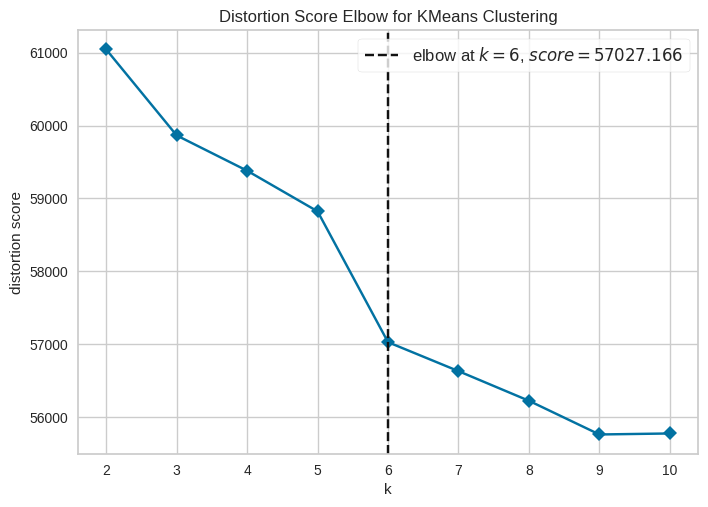

In [77]:
plot_model(kmeans, plot = 'elbow')

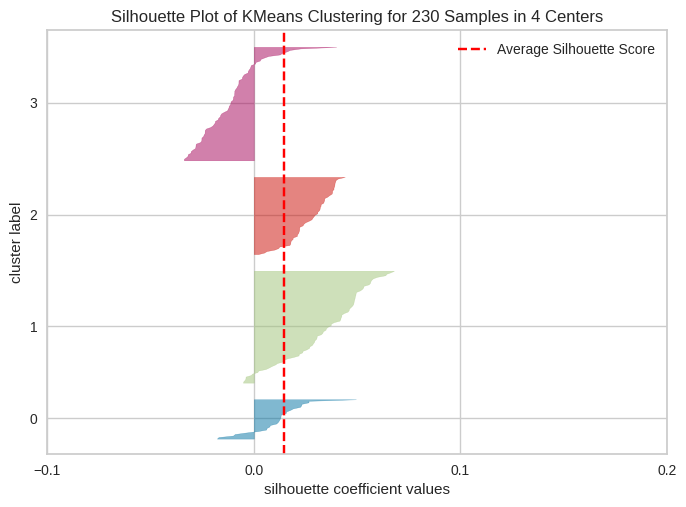

In [78]:
plot_model(kmeans, plot = 'silhouette')

In [79]:
plot_model(kmeans, plot = 'distribution')

In [80]:
plot_model(kmeans, plot = 'distribution', feature = 'Country Name')

**Execução do modelo em dados não vistos pelo algoritmo**

In [81]:
from pycaret.clustering import predict_model
predict_model(kmeans, data = base2)

,Country Name_New Zealand,Country Name_South Asia,Country Name_Gabon,Country Name_Georgia,Country Name_Sweden,Country Name_Finland,Country Name_Madagascar,Country Name_North America,Country Name_United States,Country Name_Northern Mariana Islands,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cluster
20,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,...,-0.084835,-0.084255,-0.044999,-0.030711,-0.006216,0.022238,0.019451,0.055858,0.065116,Cluster 2
25,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,...,0.158988,0.181173,0.256925,0.301800,0.325882,0.350305,0.351515,0.406080,0.464559,Cluster 3
37,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,...,0.673132,0.716977,0.869040,0.994894,1.032230,1.081267,1.100528,1.190762,1.333364,Cluster 3
71,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,...,0.833035,0.884374,1.047827,1.173565,1.189827,1.222092,1.230488,1.320901,1.477715,Cluster 0
72,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,...,1.089027,1.145330,1.337801,1.490829,1.495686,1.513901,1.518964,1.627808,1.832158,Cluster 0
79,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,...,0.990204,1.003192,1.183641,1.363709,1.428127,1.495754,1.527970,1.630816,1.804531,Cluster 0
101,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,...,0.834505,0.856483,1.013893,1.155794,1.197012,1.245591,1.261329,1.345918,1.485706,Cluster 0
129,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,...,0.011211,-0.004505,0.015929,0.006452,-0.002942,-0.004459,-0.033622,-0.015547,-0.018660,Cluster 2
133,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,...,0.744022,0.313550,-0.238204,-0.579050,-0.694229,-0.784752,-0.787731,-0.662931,-0.642468,Cluster 1
134,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,-0.066082,...,-0.261513,-0.260362,-0.263524,-0.308563,-0.327255,-0.337485,-0.378044,-0.380983,-0.429685,Cluster 1


**Salvar o modelo**

In [82]:
from pycaret.clustering import save_model
save_model(kmeans, 'kmeans_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['1961', '1962', '1963', '1964',
                                              '1965', '1966', '1967', '1968',
                                              '1969', '1970', '1971', '1972',
                                              '1973', '1974', '1975', '1976',
                                              '1977', '1978', '1979', '1980',
                                              '1981', '1982', '1983', '1984',
                                              '1985', '1986', '1987', '1988',
                                              '1989', '1990', ...],
                                     transformer=SimpleImputer())),
                 ('categoric...
                  TransformerWrapper(include=['Country Name'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
               

In [84]:
from pycaret.clustering import load_model
kmeans_carregado = load_model('/content/kmeans_final')

Transformation Pipeline and Model Successfully Loaded


In [85]:
previsoes = predict_model(kmeans_carregado, data = base2)
previsoes

,Country Name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Cluster
20,Low & middle income,1.303926,1.860753,2.338774,2.311674,2.328088,2.424018,2.367054,2.379383,2.416060,...,1.321013,1.318521,1.322586,1.321704,1.323835,1.322282,1.321783,1.316720,1.303585,Cluster 2
25,Middle East & North Africa (IDA & IBRD countries),2.661590,2.669360,2.678723,2.693598,2.709831,2.730300,2.741881,2.728886,2.686436,...,1.782840,1.799052,1.802216,1.792763,1.787035,1.770190,1.763456,1.758094,1.753158,Cluster 3
37,Sub-Saharan Africa (excluding high income),2.405521,2.414234,2.428269,2.446306,2.467617,2.492378,2.519372,2.546593,2.573163,...,2.756686,2.769071,2.774611,2.774653,2.772228,2.768171,2.759708,2.747007,2.730999,Cluster 3
71,Burkina Faso,1.342840,1.334320,1.351483,1.403717,1.479076,1.562532,1.635169,1.689184,1.717433,...,3.059560,3.072128,3.058629,3.027773,2.992039,2.960440,2.932567,2.911018,2.893466,Cluster 0
72,Burundi,1.906363,1.887975,1.929539,2.047881,2.202588,2.401721,2.543444,2.508815,2.254373,...,3.544436,3.544561,3.519276,3.477233,3.418643,3.358846,3.316265,3.297804,3.292392,Cluster 0
79,Chad,1.940259,1.970832,1.979348,1.959558,1.924917,1.874306,1.840461,1.861116,1.951818,...,3.357255,3.287234,3.274381,3.297145,3.324413,3.334069,3.328243,3.301595,3.261297,Cluster 0
101,Equatorial Guinea,1.177029,1.107137,1.175509,1.427745,1.753794,2.218125,2.500511,2.190771,1.141020,...,3.062345,3.021633,3.004723,3.002597,3.002061,2.992522,2.973588,2.942547,2.902460,Cluster 0
129,India,1.988187,2.020621,2.046165,2.063456,2.075977,2.083430,2.094185,2.117912,2.158447,...,1.502934,1.462901,1.419375,1.374351,1.328401,1.285832,1.251191,1.226730,1.209295,Cluster 2
133,Ireland,-0.148594,0.411629,0.583615,0.486083,0.374314,0.398884,0.471402,0.450327,0.584797,...,2.890960,2.038708,1.015663,0.544884,0.364214,0.220501,0.248160,0.410851,0.507199,Cluster 1
134,Isle of Man,-0.181829,0.468366,1.042305,1.474139,1.780592,2.074443,2.327085,2.412406,2.303389,...,0.986366,0.999699,0.975441,0.928078,0.876059,0.831153,0.793079,0.766181,0.746686,Cluster 1
